#<p align="center"><h1> </h1></p>
<center><h1>WYKŁAD 11</h1></center>

## Biblioteki

In [ ]:
import pandas as pd
import numpy as np

## Wczytanie zbioru

**Plik titanic** zawiera informacje dotyczące pasażerów statku RMS Titanic, który zatonął w kwietniu 1912 roku po zderzeniu z górą lodową. Plik ten jest często używany jako zestaw danych do nauki analizy danych, modelowania przewidywań i eksploracji danych.

Typowy zestaw danych titanic zawiera nastepujące kolumny:

- PassengerId: Unikalny identyfikator pasażera.
- Survived: Informacja o tym, czy pasażer przeżył katastrofę (1 - przeżył, 0 - nie przeżył).
- Pclass: Klasa biletu pasażera (1 - pierwsza klasa, 2 - druga klasa, 3 - trzecia klasa).
- Name: Imię i nazwisko pasażera.
- Sex: Płeć pasażera.
- Age: Wiek pasażera.
- SibSp: Liczba rodzeństwa / małżonków na pokładzie.
- Parch: Liczba rodziców / dzieci na pokładzie.
- Ticket: Numer biletu.
- Fare: Cena biletu.
- Cabin: Numer kabiny pasażera.
- Embarked: Port, w którym pasażer wszedł na pokład statku (C - Cherbourg, Q - Queenstown, S - Southampton).

In [ ]:
!git clone https://github.com/matzim95/ML-datasets

Cloning into 'ML-datasets'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 201 (delta 35), reused 124 (delta 24), pack-reused 60
Receiving objects: 100% (201/201), 35.87 MiB | 18.46 MiB/s, done.
Resolving deltas: 100% (47/47), done.
Updating files: 100% (130/130), done.


In [ ]:
titanic = pd.read_csv('ML-datasets/titanic.csv')

## Informacje o zbiorze

In [ ]:
# wyświetlanie n pierwszych wierszy
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [ ]:
# rozmiar df
titanic.shape

(891, 12)

In [ ]:
# wyświetlanie ogólnych informacji o zbiorze
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# statystyki opisowe
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# REGRESJA

**REGRESJA** jest techniką uczenia maszynowego (nadzorowanego). \
Umożliwia modelowania zależności między **zmienną zależną (zmienną objaśnianą)** a jedną lub większą liczbą **zmiennych niezależnych (zmiennych objaśniających)** poprzez dopasowywanie linii lub krzywej do danych.

Regresja ma na celu **przewidywanie wartości ciągłych** (w odróżnieniu od klasyfikacji, która ma na celu przypisanie danych do określonych klas) na podstawie innych wartości . \
W zależności od rodzaju danych i natury problemu, możesz wybierać różne techniki regresji, takie jak regresja liniowa (prostą, wielu zmiennych), regresja wielomianowa, regresja logistyczna itp.

## Macierz korelacji

In [ ]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean()) # uzupełniamy puste wiersze w zmiennej Age średnią

In [ ]:
titanic.info() # sprawdzenie czy w Age nie ma braków

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_num = titanic.select_dtypes(include=['int', 'float'])

In [ ]:
df_num.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250


In [ ]:
df_num=df_num.drop(columns=['PassengerId'])
df_num.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250


In [ ]:
df_num.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


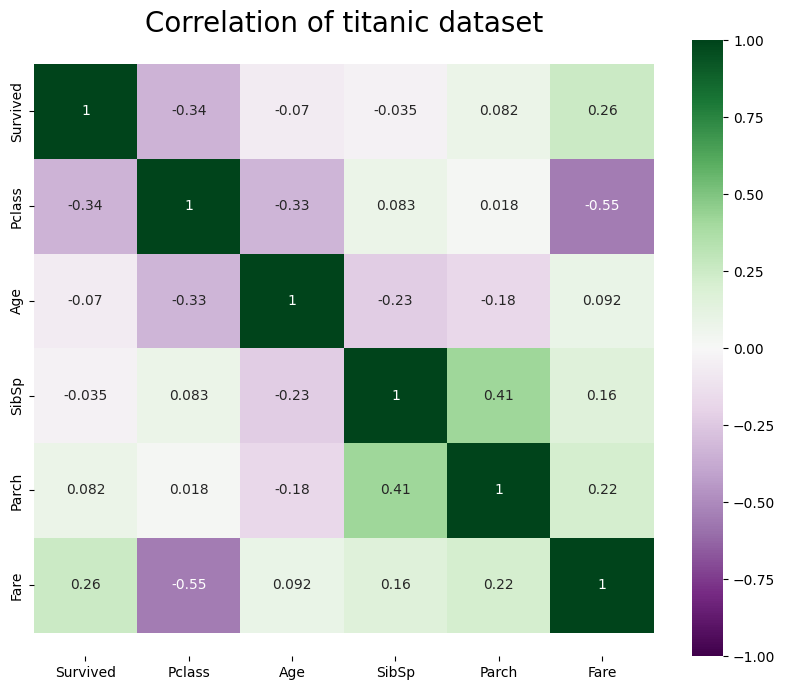

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 8))

# wizualizacja Heatmapy korelacji
ax = sns.heatmap(df_num.corr(),
                 xticklabels=df_num.corr().columns,
                 yticklabels=df_num.corr().columns,
                 cmap='PRGn',
                 vmin=-1, vmax=1, # zakres kolorystyczny dla korelacji od -1 do 1
                 annot=True, center=0)

# dekoracja wykresu
plt.title('Correlation of titanic dataset', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.25, top - 0.25) # odsunięcie etykiet od wykresu

# Zmiana wymiaru etykiet
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## Zbiór treningowy i testowy
zazwyczaj w stosunku:
- 70% do 30%
- 80% do 20%

Czasami wydzialany jest jeszcze zbiór walidacyjny

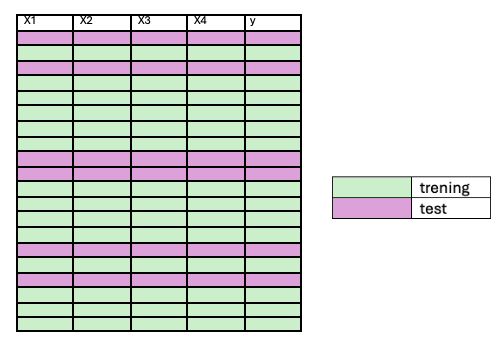

Na zbiorze treningowym:
- "uczymy" model
- dopasowujemy do danych (zwartuch w zbiorze treningowym)
- wyznaczamy wopsłoczynniki regresji ($b_0, b_1, ..., b_n$)



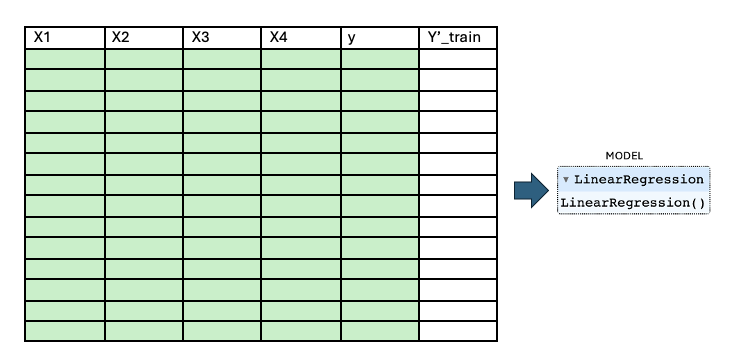

Na zbiorze testowym sprawdzmy nasz model. \
Oceniamy jak dobrze poradził sobie z danymi których nie widział.



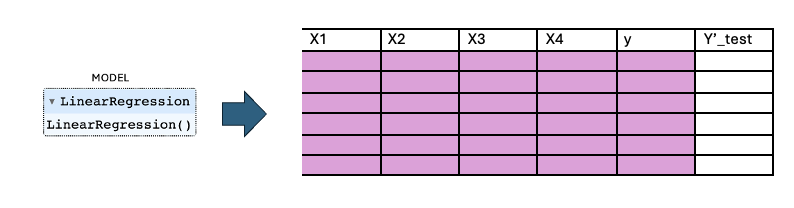




In [ ]:
# wybór zmiennych do modelu: X - zmienne objaśniające, y - zmienna objaśniana(zależna)
X = titanic[['Parch', 'SibSp', 'Age', 'Pclass']]
y = titanic[['Fare']]


# - Pclass: Klasa biletu pasażera (1 - pierwsza klasa, 2 - druga klasa, 3 - trzecia klasa).
# - Age: Wiek pasażera.
# - Parch: Liczba rodziców / dzieci na pokładzie.


In [ ]:
df_num.shape

(891, 6)

In [ ]:
X.shape # kształt zbioru - 891 wierszy i 4 kolumny: 'Parch', 'SibSp', 'Age', 'Pclass'

(891, 4)

In [ ]:
y.shape # 891 wierszy i 1 kolumna Fare

(891, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# podział X i y na zniór testowy i treningowy - 20% (test_size=0.20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# wyświetlanie kształtu zbiorów
for subset in [X, y, X_train, y_train, X_test, y_test]:
    print(subset.shape)

(891, 4)
(891, 1)
(712, 4)
(712, 1)
(179, 4)
(179, 1)


In [ ]:
# stosunek zbioru testowego do calości - sprawdzenie czy wychodzi 20%
179/891


0.20089786756453423

## Model

Model regresli liniowej prostej (jednej zmiennej)

$y'=b_0+b_1x$

Model regresji liniowej wielu zmiennych (wielorakiej)

$y'=b_0+b_1x_1+b_2x_2+...+b_nx_n$




In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_ # współczynniki modelu

array([[ 11.1385104 ,   5.26306606,  -0.14923593, -36.00334835]])

In [ ]:
model.intercept_ # wyraz wolny

array([113.74796467])

## Predykcja

In [ ]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

## Ocena modelu



**Underfitting / Overfitting**

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/Screenshot-2020-02-06-at-14.40.59-1536x881.png' width=600>  

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/Screenshot-2020-02-06-at-14.42.42-1536x919.png' width=600>  

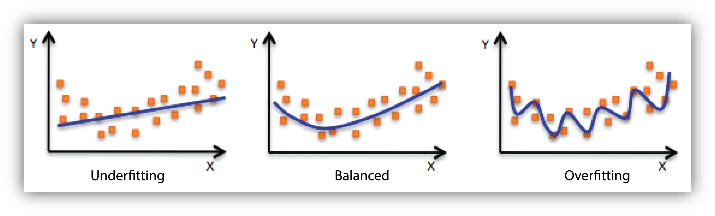

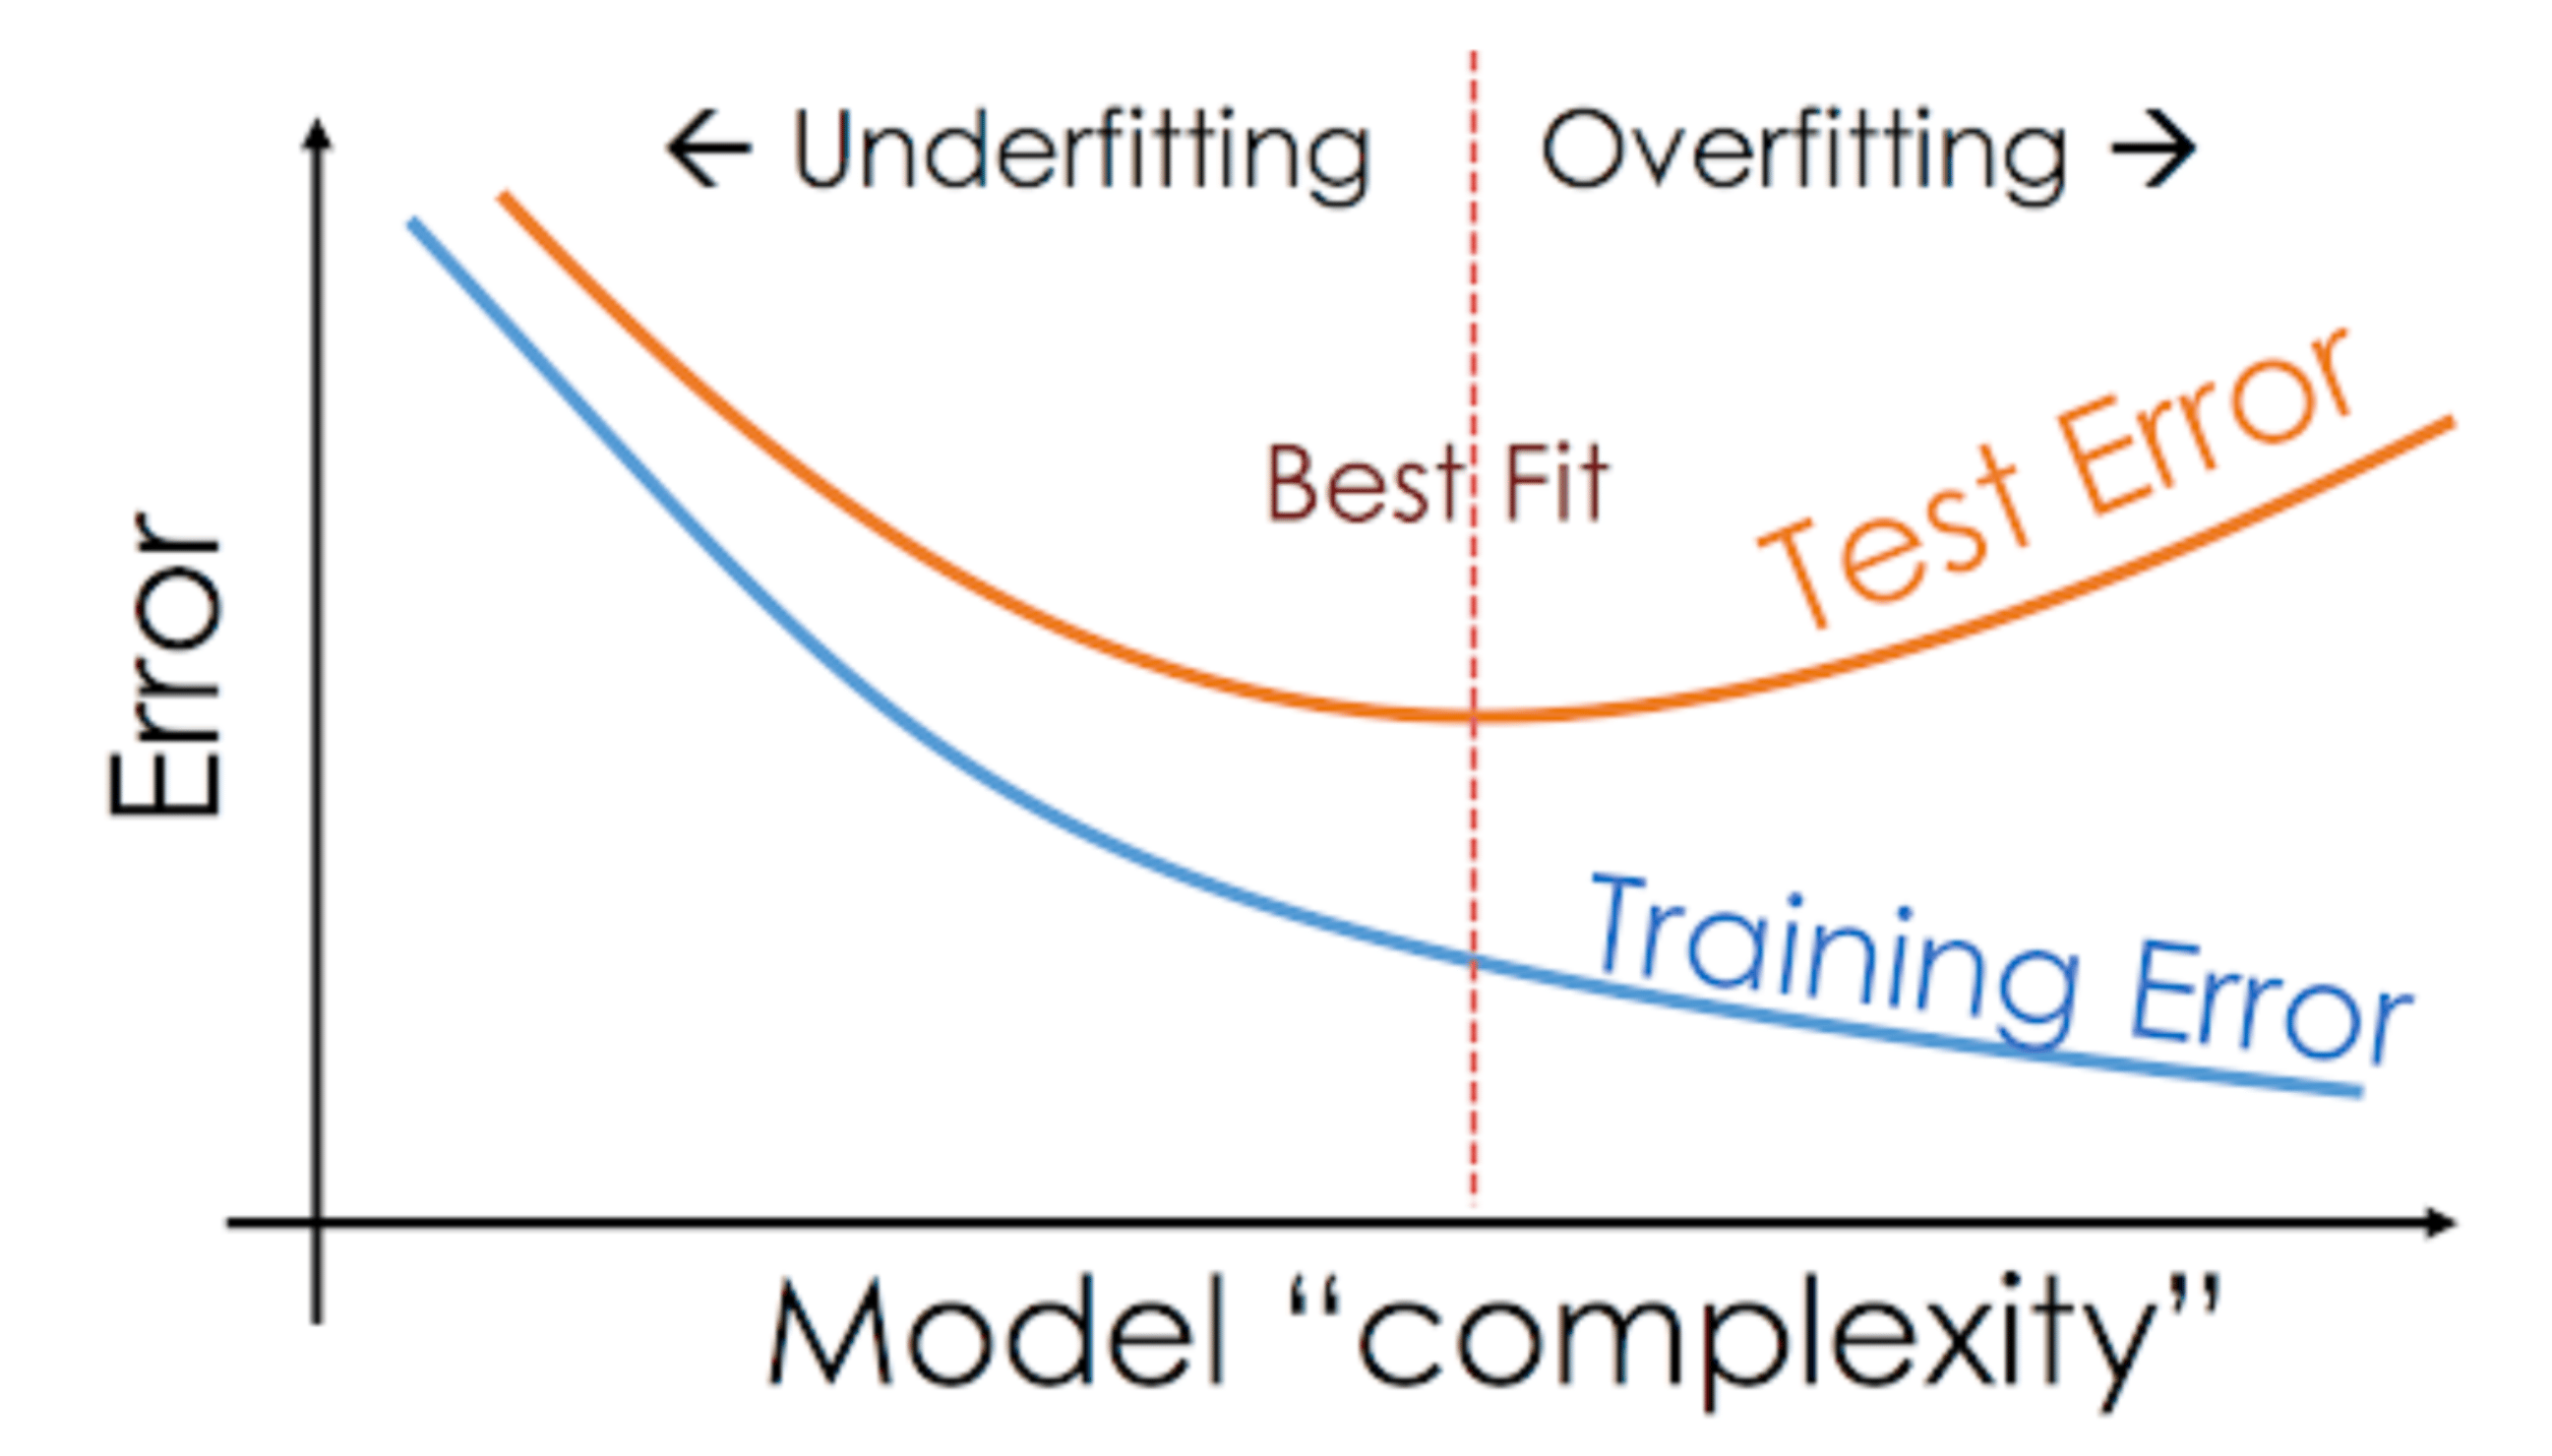

## Metryki oceny modelu

- $R^2$ - współczynnik determinacji  (im bliżej 1 tym lepiej)
- MAE - średni błąd bezwzględny (Mean absolute error)
- MSE - błąd średniokwadratowy (Mean squared error)
- RMSE - pierwiastek błędu średniokwadratowego (Root mean squared error)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
R2_train = r2_score(y_true = y_train, y_pred = y_predict_train)
R2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

MAE_train = mean_absolute_error(y_true = y_train, y_pred = y_predict_train)
MAE_test = mean_absolute_error(y_true = y_test, y_pred = y_predict_test)

MSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train)
MSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test)

RMSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train, squared = False)
RMSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test, squared = False)

print(f'''R2_train = {R2_train},     R2_test = {R2_test},
MAE_train = {MAE_train},    MAE_test = {MAE_test},
MSE_train = {MSE_train},    MSE_test = {MSE_test},
RMSE_train = {RMSE_train},    RMSE_test = {RMSE_test} ''')

R2_train = 0.3651378059136623,     R2_test = 0.3879239993548179,
MAE_train = 20.79191666970605,    MAE_test = 19.79324368735807,
MSE_train = 1712.2478925071975,    MSE_test = 947.1445327413671,
RMSE_train = 41.37931720687519,    RMSE_test = 30.775713358773135 


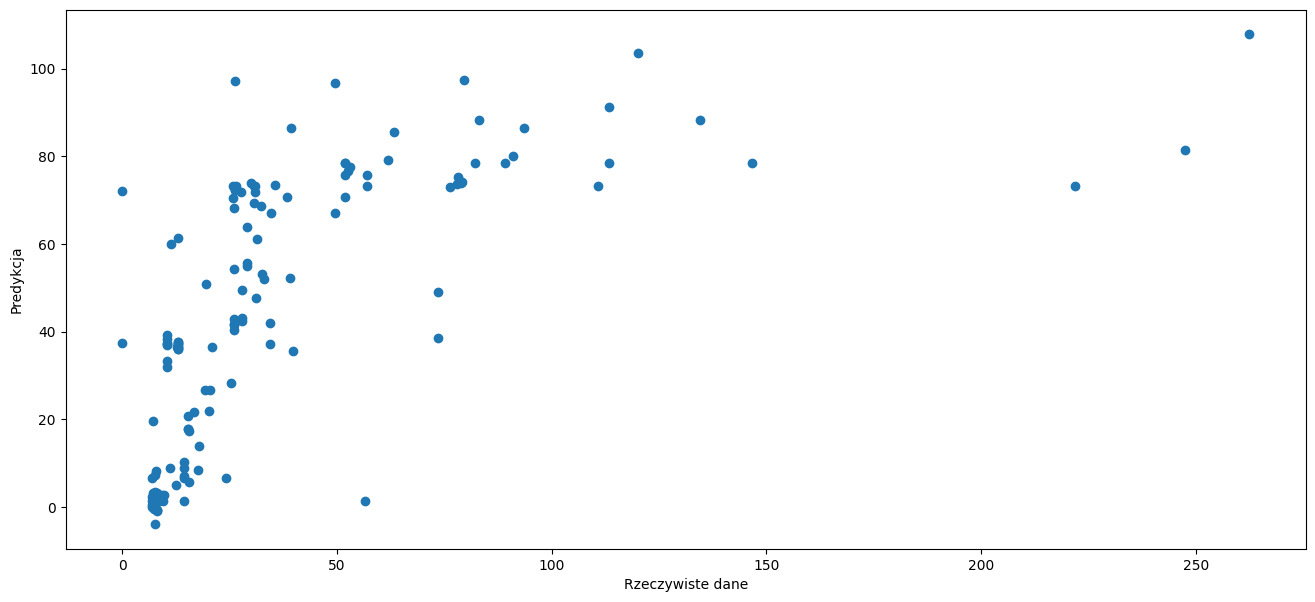

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))

ax.scatter(x=y_test,
           y=y_predict_test)

ax.set_xlabel('Rzeczywiste dane')
ax.set_ylabel('Predykcja')

plt.show()